<a href="https://colab.research.google.com/github/BretaOsodo/BretaOsodo/blob/main/Card_defraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Problem

Credit card fraud is a major concern in the financial sector, leading to billions of dollars in losses every year. Detecting fraudulent transactions quickly and accurately is essential for both banks and customers.

In this project, I aim to build a Logistic Regression model to predict whether a transaction is fraudulent (1) or legitimate (0) using the Credit Card Fraud Dataset (available on Kaggle).

Objectives:

Preprocess the dataset (handle imbalance, scale features).

Train a Logistic Regression classifier on transaction data.

Evaluate the model using accuracy, precision, recall, F1-score, and ROC-AUC.

Understand the challenges of dealing with imbalanced datasets, since fraudulent transactions are rare compared to normal ones.

Why Logistic Regression?

Logistic regression is a simple yet powerful baseline model for binary classification problems like fraud detection. It provides:

Probabilities of fraud likelihood

Interpretability of feature importance

A strong foundation before moving to more complex models

#Data Processing

## Uploading the data and Inspecting the data

In [64]:
import pandas as pd

credit_df=pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [65]:
credit_df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [66]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Creating Training,Validation and Test test

In [68]:
from sklearn.model_selection import train_test_split

train_val_df,test_df= train_test_split(credit_df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [69]:
train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201477,133898.0,1.829708,-0.317058,-0.140257,1.488031,-0.848559,-0.738625,-0.382771,0.009779,1.065785,...,-0.176994,-0.565865,0.419226,0.229066,-0.519275,-0.999790,0.038059,-0.017332,52.00,0
210354,137942.0,-0.740878,0.983972,1.364370,-0.323869,-0.290040,-0.367621,0.162275,0.417319,-0.062720,...,-0.058463,-0.192505,-0.029564,-0.096983,-0.276947,-0.524133,0.041695,0.080164,13.99,0
218330,141270.0,-0.990914,1.215008,2.463994,2.256335,0.872850,0.935735,0.537293,0.320492,-1.408975,...,0.173606,0.382773,-0.417367,0.559986,0.706042,0.041946,0.014876,0.073677,17.93,0
237957,149466.0,-1.825576,-7.545797,-3.093611,0.622567,-2.588058,0.951203,1.744615,-0.422684,-0.362463,...,1.052215,-1.636722,-1.438280,0.270685,-1.168793,-0.814259,-0.388527,0.308340,2074.26,0
121958,76381.0,1.233174,-0.784851,0.386784,-0.698559,-1.034018,-0.637028,-0.502369,-0.188057,-0.749637,...,0.027634,-0.234522,-0.059544,-0.109073,0.290326,-0.393074,0.001217,0.038588,113.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131478,79616.0,-0.877913,-0.301831,2.735473,1.253404,-1.145942,0.068037,-0.076945,0.179777,0.601691,...,0.264666,0.931641,0.143916,1.033013,-0.117342,0.753320,0.104314,0.152018,133.50,0
239193,150000.0,-1.662279,-0.278422,2.677875,1.479724,-0.641821,0.421010,-1.162016,0.946243,0.705521,...,0.318863,0.747940,-0.328271,-0.004766,0.429288,-0.220109,0.057000,-0.105868,37.90,0
67705,52666.0,-1.061497,0.978902,1.629268,-1.385857,-0.074805,-1.054468,0.893588,-0.304963,0.396304,...,-0.191385,-0.143821,-0.080626,0.448429,-0.230180,0.697131,0.306224,0.115183,25.00,0
233557,147611.0,2.081836,-0.128730,-1.497688,0.049290,0.463113,-0.260199,0.090636,-0.139337,0.305002,...,-0.300450,-0.762338,0.183893,-1.088678,-0.175748,0.243605,-0.075166,-0.079110,8.99,0


In [70]:
val_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104878,69268.0,1.186638,0.174374,0.192811,1.283202,0.085843,0.100202,0.068697,0.012306,0.321917,...,-0.130185,-0.149293,-0.130386,-0.417261,0.727474,-0.282047,0.038151,0.012069,15.15,0
105552,69585.0,1.338086,-0.262908,-1.224386,-1.229997,1.879685,3.131865,-0.616145,0.769305,0.149487,...,-0.143104,-0.551317,-0.007326,1.067888,0.410250,0.994295,-0.081192,-0.001858,10.00,0
9128,12923.0,-0.771166,1.397387,1.472145,0.065873,0.057350,-0.736374,0.687517,-0.192999,1.220862,...,-0.470332,-0.781973,0.021033,0.401564,-0.175494,-0.013405,0.262646,-0.015297,8.96,0
201800,134046.0,-0.753790,-0.004463,-0.227110,-2.410126,0.327045,-1.134313,0.105330,0.100710,1.322003,...,0.039473,0.187384,0.447314,0.752543,-2.317540,-0.287516,-0.016333,0.175144,11.73,0
60023,49120.0,0.079154,1.237330,0.263247,1.191461,0.357007,-0.837919,0.659904,-0.102563,-0.356754,...,0.191355,0.628542,0.105825,0.279335,-1.079106,-0.466951,0.113149,0.206482,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44523,41982.0,0.635420,-0.973283,0.670318,1.537942,-1.105169,0.124102,-0.212912,0.195527,0.826687,...,0.142938,0.027943,-0.330141,0.337412,0.499411,-0.315932,-0.003537,0.057904,261.62,0
77956,57300.0,0.021133,0.756361,0.485381,0.097397,0.204828,1.113588,-1.048475,-2.520008,-0.343298,...,-1.351989,0.377445,-0.280513,-0.945409,0.961331,0.504268,0.073960,0.221225,1.00,0
99541,67166.0,1.085945,0.057397,0.380779,1.181972,-0.503375,-0.885851,0.175174,-0.179025,0.124715,...,-0.013862,-0.209375,-0.080327,0.356454,0.496298,-0.444797,0.004792,0.037653,79.99,0
78359,57492.0,-0.591213,1.086637,1.278698,-0.049859,0.185514,-0.658942,0.661266,-0.013095,-0.707892,...,-0.193275,-0.499573,0.067783,0.298472,-0.148983,0.043122,0.127863,0.074741,8.70,0


In [71]:
test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69,0
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99,0
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63,0
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59,0


##Identifying our inputs and targets

In [72]:
#Identifying our Inputs and targets
target ='Class'
inputs=[col for col in train_df.columns if col not in ['Time','Class']]

In [73]:
inputs

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [74]:
train_inputs = train_df[input].copy()
train_target=train_df[target].copy()

val_inputs=val_df[inputs].copy()
val_target=val_df[target].copy()

test_inputs=test_df[inputs].copy()
test_target=test_df[target].copy()

In [75]:
train_inputs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201477,1.829708,-0.317058,-0.140257,1.488031,-0.848559,-0.738625,-0.382771,0.009779,1.065785,0.181554,...,-0.286645,-0.176994,-0.565865,0.419226,0.229066,-0.519275,-0.999790,0.038059,-0.017332,52.00
210354,-0.740878,0.983972,1.364370,-0.323869,-0.290040,-0.367621,0.162275,0.417319,-0.062720,-1.164024,...,-0.092014,-0.058463,-0.192505,-0.029564,-0.096983,-0.276947,-0.524133,0.041695,0.080164,13.99
218330,-0.990914,1.215008,2.463994,2.256335,0.872850,0.935735,0.537293,0.320492,-1.408975,0.177975,...,-0.077781,0.173606,0.382773,-0.417367,0.559986,0.706042,0.041946,0.014876,0.073677,17.93
237957,-1.825576,-7.545797,-3.093611,0.622567,-2.588058,0.951203,1.744615,-0.422684,-0.362463,-0.160229,...,4.225796,1.052215,-1.636722,-1.438280,0.270685,-1.168793,-0.814259,-0.388527,0.308340,2074.26
121958,1.233174,-0.784851,0.386784,-0.698559,-1.034018,-0.637028,-0.502369,-0.188057,-0.749637,0.543016,...,0.337732,0.027634,-0.234522,-0.059544,-0.109073,0.290326,-0.393074,0.001217,0.038588,113.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131478,-0.877913,-0.301831,2.735473,1.253404,-1.145942,0.068037,-0.076945,0.179777,0.601691,-0.730141,...,0.478435,0.264666,0.931641,0.143916,1.033013,-0.117342,0.753320,0.104314,0.152018,133.50
239193,-1.662279,-0.278422,2.677875,1.479724,-0.641821,0.421010,-1.162016,0.946243,0.705521,-0.932253,...,0.190299,0.318863,0.747940,-0.328271,-0.004766,0.429288,-0.220109,0.057000,-0.105868,37.90
67705,-1.061497,0.978902,1.629268,-1.385857,-0.074805,-1.054468,0.893588,-0.304963,0.396304,0.072543,...,0.406107,-0.191385,-0.143821,-0.080626,0.448429,-0.230180,0.697131,0.306224,0.115183,25.00
233557,2.081836,-0.128730,-1.497688,0.049290,0.463113,-0.260199,0.090636,-0.139337,0.305002,0.230680,...,-0.142484,-0.300450,-0.762338,0.183893,-1.088678,-0.175748,0.243605,-0.075166,-0.079110,8.99


In [76]:
train_target

,Class
201477,0
210354,0
218330,0
237957,0
121958,0
...,...
131478,0
239193,0
67705,0
233557,0


##Identifying NUmerical and categorical olumns for our data

In [77]:
#identifying categorical column
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

#Identifying the numerical columns
numerical_cols=[col for col in train_inputs.columns if col not in categorical_cols]


##Imputing the data

We will see if our dataset has any missing values using the pandas function .isna().sum()

In [78]:
#Inspecting for any missing values in our train_inputs
train_inputs.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


From the function we have just run for missing values e can see that we don't have any missing values. But we will still write the code to impute our data incase we add a dataset that has missing values in our model in future . I'm going to use the Multivariate Imputation formula since it's the most accurate one.

In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

#we fit and transform the sets
train_inputs[numerical_cols]=imputer.fit_transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.fit_transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.fit_transform(test_inputs[numerical_cols])

##Scalining the Numerical Data

In [80]:
#Scaling the data using sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

#we call the MinMaxScaler
scaler=MinMaxScaler()

#we fit the train_inputs[numerical_cols]
scaler.fit(train_inputs[numerical_cols])

#we transform the data sets
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

##Encoding the categorical columns

Since our dataset doesn't have any object when we run credit_df.info() we won't be doing OneHotEncoding for the categorical Columns since we have none . We can also assume that in future we will not have a dataset that has any object

##Saving the data to disk

In [81]:
print(f'train_inputs: {train_inputs.shape}')
print(f'train_target: {train_target.shape}')
print(f'val_inputs: {val_inputs.shape}')
print(f'val_target: {val_target.shape}')
print(f'test_inputs: {test_inputs.shape}')
print(f'test_target: {test_target.shape}')

train_inputs: (170883, 29)
train_target: (170883,)
val_inputs: (56962, 29)
val_target: (56962,)
test_inputs: (56962, 29)
test_target: (56962,)


In [82]:
train_inputs.to_parquet('Train_inputs')
pd.DataFrame(train_target).to_parquet('Train_target')

val_inputs.to_parquet('Val_inputs')
pd.DataFrame(val_target).to_parquet('Val_target')

test_inputs.to_parquet('Test_inputs')
pd.DataFrame(test_target).to_parquet('Test_target')

In [83]:
## We can read back the saved data using pd.read_parquet

%%time
train_inputs=pd.read_parquet('Train_inputs')
train_target=pd.read_parquet('Train_target')

val_inputs=pd.read_parquet('Val_inputs')
val_target=pd.read_parquet('Val_target')

test_inputs=pd.read_parquet('Test_inputs')
test_target=pd.read_parquet('Test_target')

CPU times: user 163 ms, sys: 134 ms, total: 297 ms
Wall time: 191 ms


#Model Trainng and Evaluations

##Select the columns o be used for training and prediction

In [84]:
x_train=train_inputs[numerical_cols]
x_val=val_inputs[numerical_cols]
x_test=test_inputs[numerical_cols]

##Create and train the model

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model=LogisticRegression(solver='liblinear')

# we fit the model
model.fit(x_train,train_target)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

##Generate predictions and probabilities

In [86]:
train_preds= model.predict(x_train)
train_probs = model.predict_proba(x_train)
accuracy_score(train_target,train_preds)

0.9989817594494479

## A helper function to predict,compute aaccuracy and plot confusion matrix

In [87]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=16
matplotlib.rcParams['figure.figsize']=(10,8)

In [88]:
def predict_and_plot(inputs,target,name=''):
  preds= model.predict(inputs)
  accuracy = accuracy_score(target,preds)
  print(f'The accuracy of the model is:{accuracy*100}')

  cf= confusion_matrix(target, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {name}')
  plt.show()
  return preds

## Evaluaet on Validation and test set

The accuracy of the model is:99.91748885221726


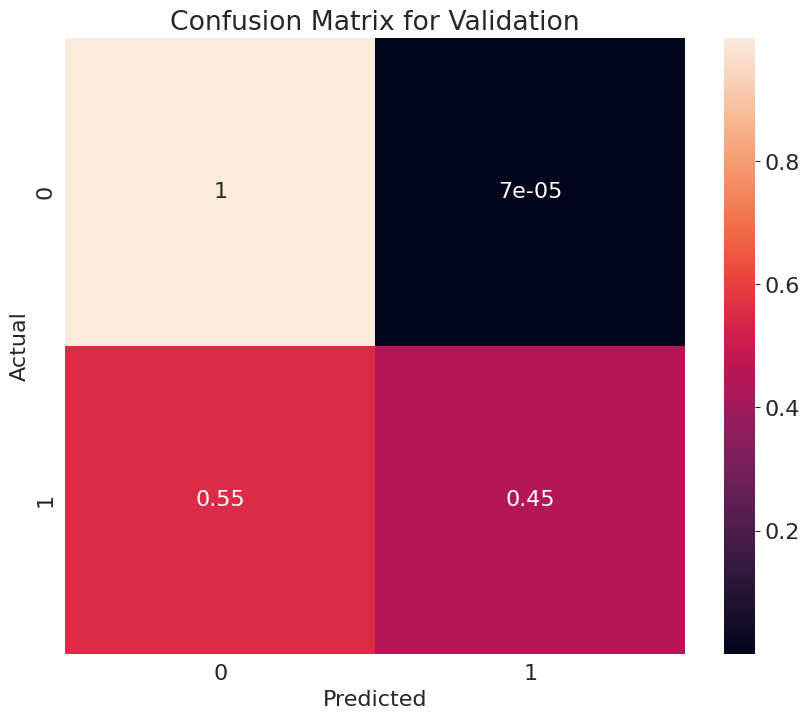

In [89]:
val_preds=predict_and_plot(x_val,val_target,'Validation')

The accuracy of the model is:99.8981759449448


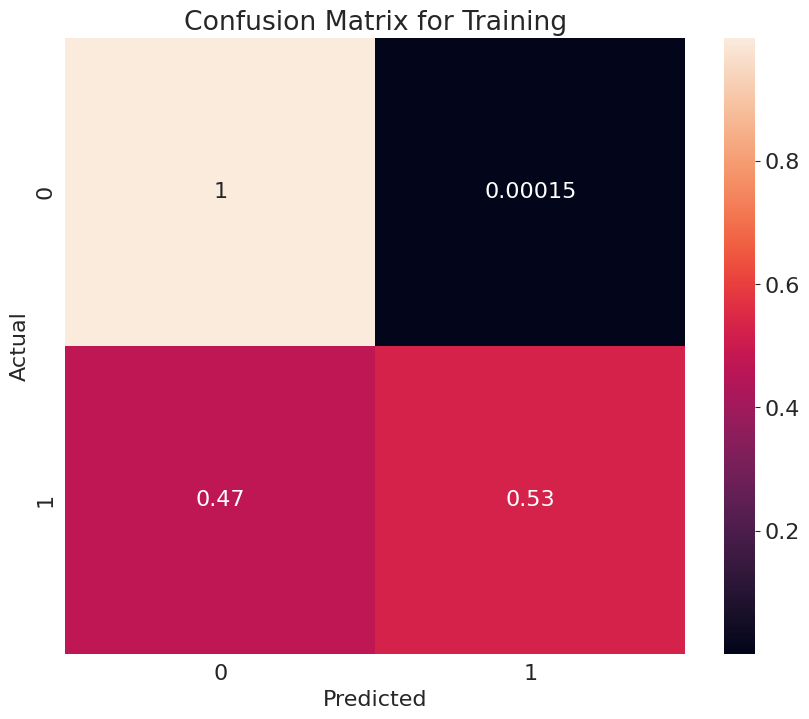

In [90]:
train_pred=predict_and_plot(x_train,train_target,'Training')

The accuracy of the model is:99.88588883817282


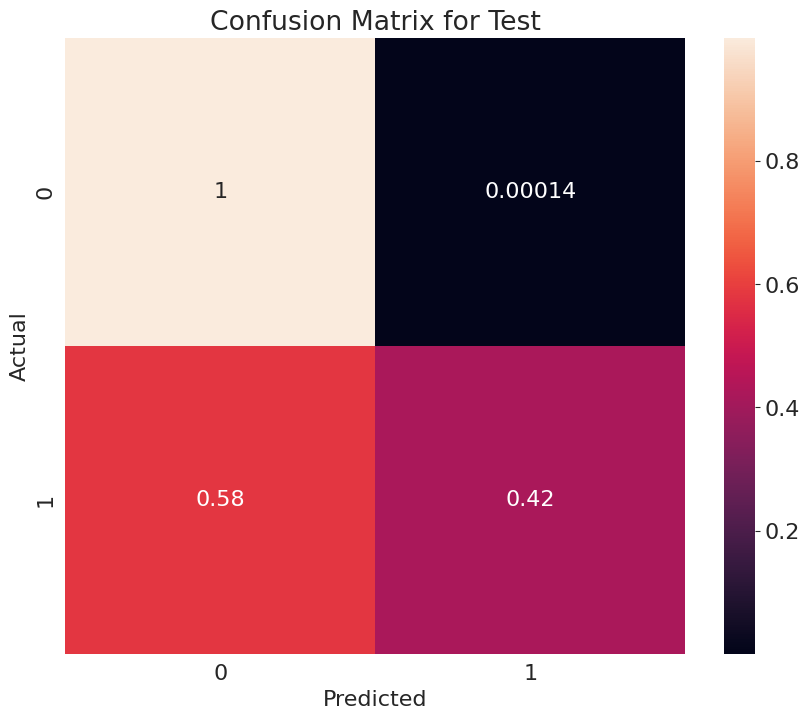

In [91]:
test_preds=predict_and_plot(x_test,test_target,'Test')


#Save the trained model and Load it back

In [92]:
import joblib
aussie_credit={
    'model':model,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'scaler':scaler,
    'imputer':imputer,
    'inputs':inputs,
    'target':target
}
joblib.dump(aussie_credit,'aussie_credit.joblib')
ausiie_credit2=joblib.load('aussie_credit.joblib')

##Predict on a single output

In [93]:
def predict_input(single_input):
  input_df=pd.DataFrame([single_input])
  input_df[numerical_cols]=scaler.transform(input_df[numerical_cols])
  x_input=input_df[numerical_cols]
  pred= model.predict(x_input)[0]
  prob=model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
  return pred,prob


In [94]:
new_input={
    'Time':10000,
    'V1':1,
    'V2':0.9,
    'V3':-10,
    'V4':2,
    'V5':0.6,
    'V6':7,
    'V7':-0.02,
    'V8':2,
    'V9':1,
    'V10':-1,
    'V11':-2,
    'V12':10,
    'V13':2,
    'V14':-3,
    'V15':-1,
    'V16':10,
    'V17':-5,
    'V18':-2,
    'V19':3,
    'V20':-0.98863,
    'V21':0.272352,
    'V22':1.29379,
    'V23':6,
    'V24':0.6,
    'V25':12,
    'V26':1,
    'V27':0.932,
    'V28':1,
    'Amount':1000000
}

In [95]:
predict_input(new_input)

(np.int64(0), np.float64(0.9999996901058475))

We have successfully predicted that the the transaction is legitimate